## Imports

In [5]:
import tarfile
import numpy as np

In [2]:
tar_file_path = "G:\\Download_BMR\\JSOC_20231120_1878.tar"
with tarfile.open(tar_file_path, 'r') as tar:
    # Extract all contents into the current directory
    tar.extractall(path="G:\\Download_BMR\\Extracted TAR")

## 2nd Try


In [2]:
tar_file_path = "C:\\Users\\ASUS\\Downloads\\JSOC_20231121_2925.tar"
with tarfile.open(tar_file_path, 'r') as tar:
    # Extract all contents into the current directory
    tar.extractall(path="G:\\Download_BMR\\Try")

In [6]:
from astropy.io import fits
import matplotlib.pyplot as plt

# Replace this with the path to your .fits file
fits_file_path = "C:\\Users\\ASUS\\Downloads\\mdi.fd_ic_interp.19960423_000000_TAI.data.fits"

# Open the FITS file
with fits.open(fits_file_path) as hdul: # To see the contents of the file
    image_data = hdul  # Assuming the primary HDU contains an image
    
    print(f"Data type: {type(image_data)}")
    if isinstance(image_data, np.ndarray):
        print(f"Array dtype: {image_data.dtype}")
        print(f"Array shape: {image_data.shape}")
    else:
        print("Data is not a NumPy array.")

Data type: <class 'astropy.io.fits.hdu.hdulist.HDUList'>
Data is not a NumPy array.


Filename: C:\Users\ASUS\Downloads\mdi.fd_ic_interp.19960423_000000_TAI.data.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  COMPRESSED_IMAGE    1 CompImageHDU    109   (1024, 1024)   int32   
HDU 0 does not contain image data.
HDU 1 contains image data with shape: (1024, 1024)
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


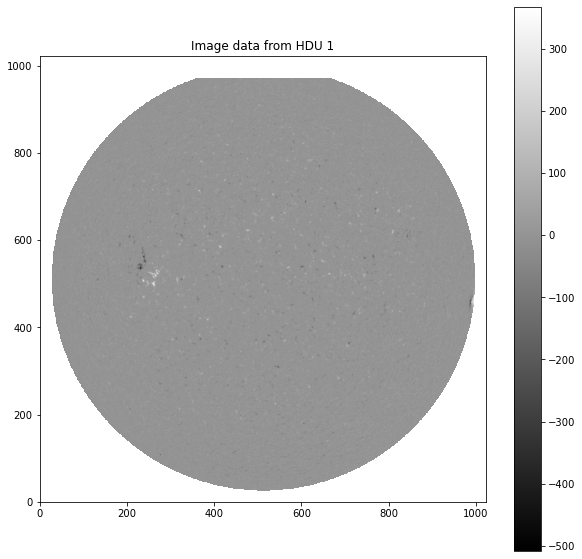

In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

# Path to the .fits file
fits_file_path = "C:\\Users\\ASUS\\Downloads\\mdi.fd_ic_interp.19960423_000000_TAI.data.fits"

# Open the FITS file to read the data
with fits.open(fits_file_path) as hdul:
    # Get info to see the structure of the HDU list
    hdul.info()
    
    # Iterate over the HDUs safely
    for index in range(len(hdul)):
        hdu = hdul[index]
        if hdu.is_image and hdu.data is not None:
            print(f"HDU {index} contains image data with shape: {hdu.data.shape}")
            # If it's the correct HDU with image data, visualize it
            print(hdu.data)
            
            plt.figure(figsize = (10,10))
            plt.imshow(hdu.data, cmap='gray', origin='lower')
            plt.colorbar()
            plt.title(f'Image data from HDU {index}')
            plt.show()
            
            break
        else:
            print(f"HDU {index} does not contain image data.")


In [10]:
!pip install --upgrade numpy astropy


  Using cached astropy-5.3.4-cp39-cp39-win_amd64.whl (6.9 MB)
  Attempting uninstall: astropy
    Found existing installation: astropy 4.3.1
    Uninstalling astropy-4.3.1:
      Successfully uninstalled astropy-4.3.1



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 3rd try MDI 90 m

Filename: G:\Download_BMR\Extracted TAR\mdi.fd_M_96m_lev182.19960415_000000_TAI.data.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  COMPRESSED_IMAGE    1 CompImageHDU     95   (1024, 1024)   int32   
HDU 0 does not contain image data.
HDU 1 contains image data with shape: (1024, 1024)


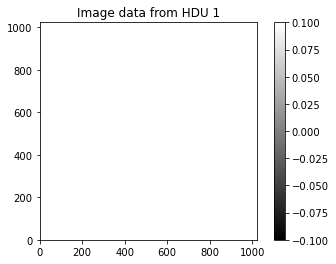

In [7]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

# Path to the .fits file
fits_file_path = "G:\\Download_BMR\\Extracted TAR\\mdi.fd_M_96m_lev182.19960415_000000_TAI.data.fits"

# Open the FITS file to read the data
with fits.open(fits_file_path) as hdul:
    # Get info to see the structure of the HDU list
    hdul.info()
    
    # Iterate over the HDUs safely
    for index in range(len(hdul)):
        hdu = hdul[index]
        if hdu.is_image and hdu.data is not None:
            print(f"HDU {index} contains image data with shape: {hdu.data.shape}")
            # If it's the correct HDU with image data, visualize it
            plt.figure()
            plt.imshow(hdu.data,cmap = 'gray' ,origin='lower')
            plt.colorbar()
            plt.title(f'Image data from HDU {index}')
            plt.show()
            break
        else:
            print(f"HDU {index} does not contain image data.")


E:\anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


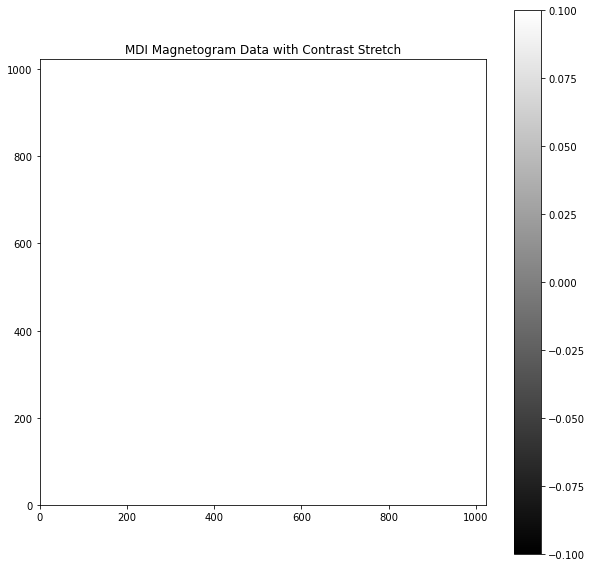

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

# Replace with the path to your FITS file
fits_file_path = "G:\\Download_BMR\\Extracted TAR\\mdi.fd_M_96m_lev182.19960415_000000_TAI.data.fits"

# Open the FITS file to read the data
with fits.open(fits_file_path) as hdul:
    # Assuming the image data is in the second HDU (index 1)
    image_data = hdul[1].data

# Apply a visualization stretch - log scale here
# Replace zeros and negative values as they are invalid for log scale
image_data = np.where(image_data <= 0, np.nan, image_data)
image_data = np.log(image_data)

# Visualize the image with adjusted settings
plt.figure(figsize=(10, 10))
# Adjust vmin and vmax to control the contrast; you might need to tweak these values
plt.imshow(image_data, cmap='gray', origin='lower', vmin=np.nanpercentile(image_data, 5), vmax=np.nanpercentile(image_data, 95))
plt.colorbar()
plt.title('MDI Magnetogram Data with Contrast Stretch')
plt.show()


# Converting all the fits file into suitable format


In [22]:
from astropy.io import fits
import numpy as np

def load_fits_image(fits_file_path):
    # Open the FITS file to read the data
    with fits.open(fits_file_path) as hdul:
        # Assuming the image data is in the second HDU (index 1)
        image_data = hdul[1].data.astype(np.float32)  # Ensure data is in float32 for neural network compatibility
        
        # Handle NaN values if present
        if np.isnan(image_data).any():
            image_data = np.nan_to_num(image_data)
        
        # Normalize the image data to [0, 1]
        image_data = (image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data))
        
        # Add a channel dimension if the model expects it
        image_data = np.expand_dims(image_data, axis=-1)
        
    return image_data


In [24]:
img = load_fits_image("C:\\Users\\ASUS\Downloads\\mdi.fd_ic_interp.19960423_000000_TAI.data.fits")

1024

## Merging data and image

In [2]:
from scipy.io import readsav

# Replace 'path_to_file.sav' with the path to your .sav file
sav_file_path = "G:\\BMR_Identification\\mdi_bmr_ind_19961228_0448.sav"

# Read the .sav file
idl_data = readsav(sav_file_path)

# idl_data is a dictionary-like object which contains your data
print(idl_data)


{'bmr_ind': array([338819, 339843, 340866, 340867, 340868, 341890, 341891, 341892,
       341893, 342914, 342915, 342916, 342917, 342918, 343938, 343939,
       343940, 343941, 343942, 343943, 344962, 344963, 344964, 344965,
       344966, 344967, 344968, 344969, 345985, 345986, 345987, 345988,
       345989, 345990, 345991, 345992, 345993, 345994, 345995, 347009,
       347010, 347011, 347012, 347013, 347014, 347015, 347016, 347017,
       347018, 347019, 347020, 347021, 348032, 348033, 348034, 348035,
       348036, 348037, 348038, 348039, 348040, 348041, 348042, 348043,
       348044, 348045, 349056, 349057, 349058, 349059, 349060, 349061,
       349062, 349063, 349064, 349065, 349066, 349067, 349068, 349069,
       349070, 350079, 350080, 350081, 350082, 350083, 350084, 350085,
       350086, 350087, 350088, 350089, 350090, 350091, 350092, 350093,
       350094, 351102, 351103, 351104, 351105, 351106, 351107, 351108,
       351109, 351110, 351111, 351112, 351113, 351114, 351115, 35

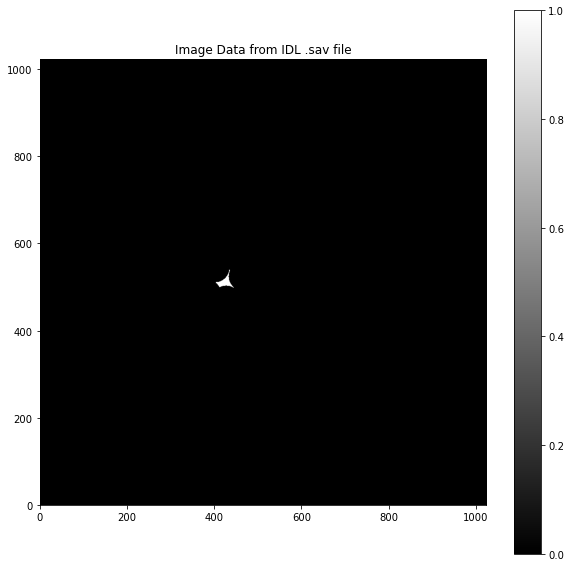

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import readsav

# Replace 'path_to_file.sav' with the path to your .sav file
sav_file_path = "G:\\BMR_Identification\\mdi_bmr_ind_19961231_0624.sav"

# Read the .sav file
idl_data = readsav(sav_file_path)

# Assuming idl_data is already loaded and is a dictionary-like object
# hdr_los would typically be the header with the image's metadata
hdr_los = idl_data['hdr_los']

# Assuming the 'naxis1' and 'naxis2' are attributes of hdr_los that specify the image dimensions
naxis1 = hdr_los.naxis1[0]  # Accessing the first element if it's a one-element array
naxis2 = hdr_los.naxis2[0]  # Accessing the first element if it's a one-element array

# Create an empty image array based on the dimensions specified in the header
image_data = np.zeros((naxis2, naxis1))

# bmr_ind are the indices in the image array that should be set to 1
# We need to convert these indices into 2D indices
# This assumes bmr_ind is a flat index into the 2D image_data array
bmr_ind = idl_data['bmr_ind']

# Calculate the 2D indices from the 1D flat indices
rows, cols = np.divmod(bmr_ind, naxis1)

# Set the specified indices in the image_data array to 1
image_data[rows, cols] = 1

# Now, visualize the image_data array
plt.figure(figsize=(10, 10))
plt.imshow(image_data, cmap='gray', origin='lower')
plt.colorbar()
plt.title('Image Data from IDL .sav file')
plt.show()


## Converting all the Y set into suitable format

In [19]:
import numpy as np
import os
from scipy.io import readsav

def process_sav_file(sav_file_path):
    # Read the .sav file
    idl_data = readsav(sav_file_path)
    
    # Extract image dimensions and indices
    hdr_los = idl_data['hdr_los']
    naxis1 = hdr_los.naxis1[0]
    naxis2 = hdr_los.naxis2[0]
    bmr_ind = idl_data['bmr_ind']
    
    # Convert flat indices to 2D indices
    rows, cols = np.divmod(bmr_ind, naxis1)

    # Create an empty image and set the magnetic regions to 1
    image_data = np.zeros((naxis2, naxis1), dtype=np.float32)
    image_data[rows, cols] = 1.0

    return image_data

def image_data_generator(file_paths):
    for file_path in file_paths:
        yield process_sav_file(file_path)

# Directory containing the .sav files
sav_files_folder = "G:\\BMR_Identification\\"

# Get a list of all .sav file paths
sav_file_paths = [os.path.join(sav_files_folder, f) for f in os.listdir(sav_files_folder) if f.endswith('.sav')]

# Create a generator
data_gen = image_data_generator(sav_file_paths)

# Use the generator, for example, in a training loop
for image_data in data_gen:
    # Here you would add your code to train your model on image_data
    # For instance: model.fit(image_data, ...)
    pass


## Model

In [11]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model

def unet(input_size=(256, 256, 1)):
    inputs = Input(input_size)
    # Define the U-Net architecture here...
    # Example for the first layer (down-sampling):
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    # You would add more layers to complete the architecture

    # Example for the last layer (up-sampling and output):
    up9 = UpSampling2D(size=(2, 2))(pool1)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(up9)
    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)  # Output layer

    model = Model(inputs=[inputs], outputs=[conv10])
    return model

# Instantiate and compile the U-Net model
model = unet(input_size=(1024, 1024, 1))  # Adjust the input size to match your images
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Assuming X_train and Y_train are your prepared datasets
# X_train: array of input images
# Y_train: array of binary masks indicating the magnetic regions

# Train the model
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_split=0.1)

# Evaluate the model
# Replace X_test and Y_test with your test data and labels
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
